Import python libraries required for the script

In [1]:
# # Performance metrics
# from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix

# #Classifier imports
# from sklearn.linear_model import LogisticRegression, SGDClassifier
# from sklearn.model_selection import KFold
# from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.neural_network import MLPClassifier
# from sklearn.svm import SVC, LinearSVC, NuSVC
# from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier
# from sklearn.ensemble import RandomForestClassifier, VotingClassifier
# from sklearn.model_selection import train_test_split

import itertools
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# from rfpimp import *
# from rfpimp import *
# from xgboost import XGBClassifier
# from xgboost import plot_importance
# from matplotlib import pyplot

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_score

# from rfpimp import *
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.preprocessing import MinMaxScaler

Read the CSV files

In [2]:
df = pd.read_csv('..\BridgestoneData\VMI_BP1_mod01.v1.csv')
print(df.columns)

Index(['MACHINEID', 'UPDATETIME', 'GT_BARCODE', 'TIRE_TYPE', 'COMPONENT_TYPE',
       'CUT_LENGTH', 'CONV_TIME', 'SPLICE_LENGTH_LEFT', 'SPLICE_LENGTH_MID',
       'SPLICE_LENGTH_RIGHT', 'PRESSURE_S1_L', 'PRESSURE_S1_R',
       'PRESSURE_S2_L', 'PRESSURE_S2_R', 'PRESSURE_S3_L', 'PRESSURE_S3_R',
       'PRESSURE_S4_L', 'PRESSURE_S4_R', 'PRESSURE_S5_L', 'PRESSURE_S5_R',
       'PRESSURE_S6_L', 'PRESSURE_S6_R', 'PRESSURE_S7_L', 'PRESSURE_S7_R',
       'PRESSURE_S8_L', 'PRESSURE_S8_R', 'COMP_PART', 'COMP_BARCODE',
       'COMP_BUILDDATE', 'COMP_MACHINEID', 'COMP_POSITION_BIN',
       'LFT_SPLICE_BIN', 'LFT_SPLICE_DELTA', 'LFT_SPLICE_LAG1',
       'LFT_SPLICE_MA5', 'LFT_SPLICE_MA10', 'LFT_SPLICE_MA20',
       'LFT_SPLICE_MA50', 'LFT_SPLICE_SLOPE5', 'LFT_SPLICE_SLOPE10',
       'LFT_SPLICE_SLOPE20', 'LFT_SPLICE_SLOPE50', 'MID_SPLICE_BIN',
       'MID_SPLICE_DELTA', 'MID_SPLICE_LAG1', 'MID_SPLICE_MA5',
       'MID_SPLICE_MA10', 'MID_SPLICE_MA20', 'MID_SPLICE_MA50',
       'MID_SPLICE_SLOPE5', 

In [3]:
df = df.drop(['MACHINEID', 'UPDATETIME', 'GT_BARCODE', 'TIRE_TYPE', 'COMPONENT_TYPE',
              'SPLICE_LENGTH_LEFT',  'SPLICE_LENGTH_MID', 'SPLICE_LENGTH_RIGHT', 
              'COMP_PART', 'COMP_BARCODE', 'COMP_BUILDDATE',
              'LFT_SPLICE_BIN', 'LFT_SPLICE_DELTA', 
              'MID_SPLICE_BIN', 'MID_SPLICE_DELTA', 
              'RHT_SPLICE_BIN',  'RHT_SPLICE_DELTA', 
              'LFT_SPLICE_OK', 'MID_SPLICE_OK', 'RHT_SPLICE_OK',
              'PRESSURE_S6_L', 'PRESSURE_S6_R', 'PRESSURE_S7_L', 'PRESSURE_S7_R', 'PRESSURE_S8_L', 'PRESSURE_S8_R',
              'COMP_MACHINEID'
             ], axis=1)

print(df.columns)

Index(['CUT_LENGTH', 'CONV_TIME', 'PRESSURE_S1_L', 'PRESSURE_S1_R',
       'PRESSURE_S2_L', 'PRESSURE_S2_R', 'PRESSURE_S3_L', 'PRESSURE_S3_R',
       'PRESSURE_S4_L', 'PRESSURE_S4_R', 'PRESSURE_S5_L', 'PRESSURE_S5_R',
       'COMP_POSITION_BIN', 'LFT_SPLICE_LAG1', 'LFT_SPLICE_MA5',
       'LFT_SPLICE_MA10', 'LFT_SPLICE_MA20', 'LFT_SPLICE_MA50',
       'LFT_SPLICE_SLOPE5', 'LFT_SPLICE_SLOPE10', 'LFT_SPLICE_SLOPE20',
       'LFT_SPLICE_SLOPE50', 'MID_SPLICE_LAG1', 'MID_SPLICE_MA5',
       'MID_SPLICE_MA10', 'MID_SPLICE_MA20', 'MID_SPLICE_MA50',
       'MID_SPLICE_SLOPE5', 'MID_SPLICE_SLOPE10', 'MID_SPLICE_SLOPE20',
       'MID_SPLICE_SLOPE50', 'RHT_SPLICE_LAG1', 'RHT_SPLICE_MA5',
       'RHT_SPLICE_MA10', 'RHT_SPLICE_MA20', 'RHT_SPLICE_MA50',
       'RHT_SPLICE_SLOPE5', 'RHT_SPLICE_SLOPE10', 'RHT_SPLICE_SLOPE20',
       'RHT_SPLICE_SLOPE50', 'SPLICE_OK'],
      dtype='object')


Check the columns in the data

In [4]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
print(missing_data.head(10))
df = df.dropna()

                    Total  Percent
SPLICE_OK               0      0.0
LFT_SPLICE_SLOPE10      0      0.0
LFT_SPLICE_MA50         0      0.0
LFT_SPLICE_MA20         0      0.0
LFT_SPLICE_MA10         0      0.0
LFT_SPLICE_MA5          0      0.0
LFT_SPLICE_LAG1         0      0.0
COMP_POSITION_BIN       0      0.0
PRESSURE_S5_R           0      0.0
PRESSURE_S5_L           0      0.0


In [5]:
X = df.drop(['SPLICE_OK'], axis=1)
y = df['SPLICE_OK']
y = y.astype('int')

In [6]:
# use train/test split with different random_state values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=4)

# check classification accuracy of XGB
xgb = XGBClassifier(n_estimators=250, max_depth=5) 
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

# cross-validation with 10 folds
# scores = cross_val_score(xgb, X, y, cv=10, scoring='accuracy')
# print(scores)


0.8391351060972334


In [7]:
# use average accuracy as an estimate of out-of-sample accuracy
# print(scores.mean())

In [8]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
#         print("Normalized confusion matrix")
#     else:
#         print('Confusion matrix, without normalization')

#     print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

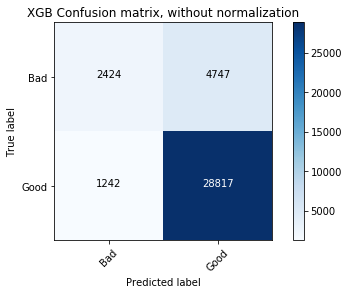

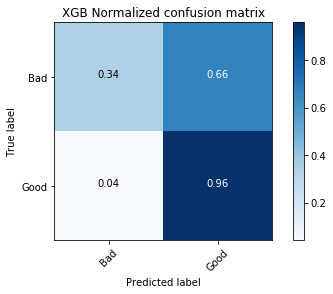

In [9]:
xgb.fit(X_train,y_train)
y2_XGB_model = xgb.predict(X_test)

# target_names = ['Bad', 'OK', 'Good']
target_names = ['Bad', 'Good']
class_names = target_names

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y2_XGB_model)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='XGB Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='XGB Normalized confusion matrix')

plt.show();

In [10]:
# # search for an optimal value of estimators for XGB
# k_range = list(range(25, 151, 25))
# k_scores = []
# for k in k_range:
#     xgb = XGBClassifier(n_estimators=k)
#     scores = cross_val_score(xgb, X, y, cv=10, scoring='accuracy')
#     k_scores.append(scores.mean())
#     print(k, ' -- ', scores)
# print(k_scores)

In [11]:
# import matplotlib.pyplot as plt
# %matplotlib inline

# # plot the value of K for XGB (x-axis) versus the cross-validated accuracy (y-axis)
# plt.plot(k_range, k_scores)
# plt.xlabel('Value of n_estimators for XGB')
# plt.ylabel('Cross-Validated Accuracy')

In [12]:
# https://github.com/justmarkham/scikit-learn-videos/blob/master/07_cross_validation.ipynb

In [13]:
# https://github.com/justmarkham/scikit-learn-videos

In [14]:
# # https://kevinzakka.github.io/2016/07/13/k-nearest-neighbor/#parameter-tuning-with-cross-validation

# # changing to misclassification error
# MSE = [1 - x for x in cv_scores]

# # determining best k
# optimal_k = neighbors[MSE.index(min(MSE))]
# print "The optimal number of neighbors is %d" % optimal_k

# # plot misclassification error vs k
# plt.plot(neighbors, MSE)
# plt.xlabel('Number of Neighbors K')
# plt.ylabel('Misclassification Error')
# plt.show()